# NER-ChatGPT
- **Nome**: Geovane SIlva De Araujo
- **LinkedIn**: https://www.linkedin.com/in/geovane-araujo-07str/
- **E-mail**: geovaneslvrs79@gmail.com

- **Data**: 30/11/2023

- **Descrição**: **Este notebook Descreve a implementação de um algoritmo que usa a API do ChatGPT para realizar a tarefa de Reconhecimento de entidades nomeadas(NER), aplicado ao âmbito jurídico com o Dataset LENER-BR.**


# Bibliotecas e Ferramentas

* instalando bibliotecas necessárias

In [ ]:
!pip install openai==0.28

In [ ]:
!pip install datasets seqeval

In [ ]:
!pip install -U accelerate
!pip install -U transformers

In [ ]:
from datasets import Dataset, DatasetDict
from datasets import load_dataset, load_metric

#Preparação Dataset Lener-Br

In [ ]:
#carregando o dataset Lener-BR
datasets = load_dataset("lener_br")

In [ ]:
#Pegando todos os tokens do dataset de Test do Lener-Br
texto_test = datasets["test"]["tokens"]
texto_test

In [ ]:
#Percorrendo os elementos, apenas para visualização dos itens
for i in texto_test:
  print(i)

# Implementação Api ChatGPT

In [3]:
import openai

# Configurar a API do OpenAI
# Caso não tenha solicite a api no link: https://platform.openai.com/account/api-keysopenai.api_key = '*********************************'

#Função que realiza a chamada ao ChatGPT
def recognize_entities(prompt, model):
    completions = openai.Completion.create(
        engine=model,
        prompt=prompt,
        max_tokens=1024,
        n=1,
        stop=None,
        temperature=0.5
    )
    message = completions.choices[0].text
    return message.strip()

In [ ]:
#lista par adicionar a resposta do ChatGPT
Res_sentencas_GPT = []

* Sentença teste para ver o retorno do chatGPT em apenas uma sentença

In [ ]:
#sentenças separadas para teste
# texto_teste02 = 'Número do Acórdão ACÓRDÃO 1160/2016 - PLENÁRIO Relator AUGUSTO NARDES Processo 006.010/2000-4 Tipo de processo TOMADA DE CONTAS SIMPLIFICADA ( TCSP ) Data da sessão 11/05/2016 Número da ata 16/2016 Relator da deliberação recorrida Ministra Ana Arraes'
# texto_teste01 = 'Responsáveis : Aldo da Silva Fagundes ( 000.212.881-00 ) ; Antonio Carlos de Nogueira ( 002.094.571-04 ) ; Carlos Aureliano Motta de Souza ( 090.118.467-53 ) ; Carlos de Almeida Baptista ( 005.128.930-04 ) ; Edson Alves Mey ( 025.120.847-87 ) ; Grupo Ok Construções e Empreendimentos Ltda. ( 24.934.309/0001-17 ) ; Luiz de Oliveira Alves ( 182.583.101-78 ) ; Raul Lopes Biangolino ( 290.244.477-04 ) 3.3'

texto_teste02 = "Responsáveis : Aldo da Silva Fagundes ( 000.212.881-00 ) ; Antonio Carlos de Nogueira ( 002.094.571-04 ) ; Carlos Aureliano Motta de Souza ( 090.118.467-53 ) ; Carlos de Almeida Baptista ( 005.128.930-04 ) ; Edson Alves Mey ( 025.120.847-87 ) ; Grupo Ok Construções e Empreendimentos Ltda. ( 24.934.309/0001-17 ) ; Luiz de Oliveira Alves ( 182.583.101-78 ) ; Raul Lopes Biangolino ( 290.244.477-04 ) 3.3"

prompt =  f"Você é um sistema de reconhecimento de entidade nomeada (NER) altamente inteligente e preciso. Seu formato de saída é apenas [('T': tipo de entidade predefinida, 'E': entidade no texto de entrada)]. O texto é:{texto_teste02}"
#model = "davinci-002" # 16,384 tokens
model = "text-davinci-003" #4,097 tokens
entities_testes = recognize_entities(prompt, model)
print(entities_testes)

* percorrendo as sentensas do Lener-BR e aplicando no prompt do ChatGPT

In [ ]:
#esta é a aplicação que é principal onde as sentenças do lener-br são aplicadas ao prompt do ChatGPT

# percorrendo todos os elementos do dataset de Test do Lener, foi necessário quebrar as execuções até atingir
# o total de sentenças do dataset, por conta que a utilização da API ser paga a partir do momento em que excede a
# cota de utilização grátis.
for index in range(1,len(texto_test)): #tamanho total 1390,  ultima parada 653
  value = texto_test[index]
  prompt =  f"Você é um sistema de reconhecimento de entidade nomeada (NER) altamente inteligente e preciso. Você recebe um texto como entrada e sua tarefa é reconhecer e extrair tipos específicos de entidades nomeadas nesse texto e classificá-las de acordo com um conjunto de tipos de entidades. As entidades predefinidas são: PESSOA, LOCAL, ORGANIZACAO,TEMPO,LEGISLACAO,JURISPRUDENCIA. Seu formato de saída é apenas [('T': tipo de entidade predefinida, 'E': entidade no texto de entrada)]. O texto é:{value}"
  # model = "davinci-002" # 16,384 tokens
  model = "text-davinci-003" #4,097 tokens
  entities = recognize_entities(prompt, model)
  Res_sentencas_GPT.append(entities)
  #caso queira acompanhar o retorno do chatGPT para cada sentença descomente a linha abaixo
  # print(f'Sentença: {index}, Resposta: {entities}') # print index e resultado de cada sentença!


In [ ]:
# Salvando a resposta do ChatGPT em um arquivo csv
pd.DataFrame(Res_sentencas_GPT).to_csv('resposta_ChatGPT.csv')

# Analise dados

In [ ]:
import pandas as pd
import csv
from csv import reader

In [ ]:
#lendo o arquivo csv
with open('/content/resposta_ChatGPT.csv', mode='r') as arquivo_csv:
	leitor_csv = csv.reader(arquivo_csv)
	for i in leitor_csv:
		print(i)

In [ ]:
#Como eu quebrei a execuções salvei as respostas em dois arquivos csv
#item01 e item02 estão lendo os arquivos csv respectivamente
item01 = pd.read_csv('/content/res1_653_CHATGPT.csv')
item02 = pd.read_csv('/content/parte2_653-1390.csv')

In [ ]:
# unindo os arquivos csv
output1 = pd.concat([item01, item02], ignore_index = True)

In [ ]:
# Atribuindo duas colunas para o dataframe
output1.columns = ['id', 'Resposta']

In [ ]:
#adicionando o id a cada item
for i in range(0, 1390):
  output1['id'][i] = i+1

In [ ]:
#ouve uma duplicata da coluna id então foi necessario remover ela
output1.pop('id')

In [ ]:
# vendo o resultado
output1

In [ ]:
# criando o dicionario para separar as respostas
chatGPT_saida = {
    'id':[],
    'resposta':[],
    'ner_tags':[]
              }


In [ ]:
# percorrendo todos os itens, removendo a palavra Saída da resposta e atribuindo todos os itens de ner_tags com 'O'
for i in range(1390):
  chatGPT_saida['id'].append(i+1)
  chatGPT_saida['resposta'].append(output1['Resposta'][i].replace('Saída:',''))
  chatGPT_saida['ner_tags'].append(['o'])

In [ ]:
len(chatGPT_saida['resposta'])

1390

In [ ]:
for i in range(1390):
  print(f"{chatGPT_saida['id'][i], chatGPT_saida['resposta'][i], chatGPT_saida['ner_tags'][i]}")

In [ ]:
pd.DataFrame(chatGPT_saida).to_csv('csv_completo_1390.csv')

* Crregando o arquivo csv com todas as respostas do chatGPT

In [ ]:
#Carregando arquivo CSV com toas as respostas das sentenças
item03 = pd.read_csv('/content/csv_completo_1390.csv')

In [ ]:
# mostrando os dados carregado
item03

* Estruturação do item03, adicionando as colunas tokens e ner_tags do Dataset Lener-br e seus respectivos valores.

In [ ]:
dict_ent = {0: 'O',
            1: 'B-ORGANIZACAO',
            2: 'I-ORGANIZACAO',
            3: 'B-PESSOA',
            4: 'I-PESSOA',
            5: 'B-TEMPO',
            6: 'I-TEMPO',
            7: 'B-LOCAL',
            8: 'I-LOCAL',
            9: 'B-LEGISLACAO',
            10: 'I-LEGISLACAO',
            11: 'B-JURISPRUDENCIA',
            12: 'I-JURISPRUDENCIA'}


item03['tokens'] = datasets['test']['tokens']
item03['ner_tags'] = datasets['test']['ner_tags']
item03['ner_tags'] = item03['ner_tags'].apply(lambda x : [dict_ent[item] for item in x])

In [ ]:
# para a construção dos itens da coluna texto, foi necessário unir os tokens com um espaço entre eles ' '.
item03['texto'] = item03['tokens'].apply(lambda x : ' '.join(x))

* estruturando a resposta do chatGPT para o formato IOB

In [ ]:
import re
import tqdm

marcacoes_docs = []
entidades = ['LEGISLACAO','ORGANIZACAO','PESSOA','JURISPRUDENCIA','LOCAL','TEMPO']
for id, row in tqdm.tqdm(item03.iterrows()):
  padraoTE = r"\('T':\s*([^,]+),\s*'E':\s*([^)]+)\)"
  padrao = r"\(\s*([^,]+),\s*\s*([^)]+)\)"

  grupos = re.findall(padraoTE, row['resposta'])
  if len(grupos) == 0:
    grupos = re.findall(padrao, row['resposta'])

  doc = row.tokens

  print(doc)
  print(type(doc))
  marcacoes = ["O"] * len(doc)

  for grupo in grupos:
      t_valor = grupo[0].upper().replace('Ç','C').replace('Ã','A').replace('Ê','E')
      if t_valor.startswith("'") and t_valor.endswith("'"):
        t_valor = t_valor[1:len(t_valor)-1]
      if (t_valor not in entidades):
        continue
      e_valor = grupo[1]
      if e_valor.startswith("'") and e_valor.endswith("'"):
        e_valor = e_valor[1:len(e_valor)-1]
      print(f"T: {t_valor}, E: {e_valor}")
      tokens_entidade = e_valor.split()
      print('tokens_entidade', tokens_entidade)
      print(doc)

      for i in range(len(doc)):
        if doc[i:i + len(tokens_entidade)] == tokens_entidade:
            marcacoes[i] = "B-" + t_valor
            for j in range(i + 1, i + len(tokens_entidade)):
                marcacoes[j] = "I-" + t_valor
  marcacoes_docs.append(marcacoes)


item03['ner_chatgp'] = marcacoes_docs

* visualização do item03 após a estruturação de todos os itens

In [ ]:
item03

,Unnamed: 0,id,resposta,ner_tags,tokens,texto,ner_chatgp
0,0,1,"[('T': 'PESSOA', 'E': 'AUGUSTO NARDES'), ('T'...","[O, O, O, B-JURISPRUDENCIA, I-JURISPRUDENCIA, ...","[Número, do, Acórdão, ACÓRDÃO, 1160/2016, -, P...",Número do Acórdão ACÓRDÃO 1160/2016 - PLENÁRIO...,"[O, O, O, O, O, O, O, O, B-PESSOA, I-PESSOA, O..."
1,1,2,"[('PESSOA', 'Interessado'), ('PESSOA', 'Respo...","[O, O, O, O, O, O, O]","[Interessado, /, Responsável, /, Recorrente, 3...",Interessado / Responsável / Recorrente 3 .,"[B-PESSOA, O, B-PESSOA, O, B-PESSOA, O, O]"
2,2,3,"[('PESSOA', 'Interessados/Responsáveis/Recorr...","[O, O, O, O]","[Interessados/Responsáveis/Recorrentes, :, 3.1...",Interessados/Responsáveis/Recorrentes : 3.1 .,"[B-PESSOA, O, B-TEMPO, O]"
3,3,4,"[('ORGANIZACAO', 'Superior Tribunal Militar')...","[O, O, B-ORGANIZACAO, I-ORGANIZACAO, I-ORGANIZ...","[Interessado, :, Superior, Tribunal, Militar, ...",Interessado : Superior Tribunal Militar ( 00.4...,"[O, O, B-ORGANIZACAO, I-ORGANIZACAO, I-ORGANIZ..."
4,4,5,"[('PESSOA', 'Aldo da Silva Fagundes'), ('PESS...","[O, O, B-PESSOA, I-PESSOA, I-PESSOA, I-PESSOA,...","[Responsáveis, :, Aldo, da, Silva, Fagundes, (...",Responsáveis : Aldo da Silva Fagundes ( 000.21...,"[O, O, B-PESSOA, I-PESSOA, I-PESSOA, I-PESSOA,..."
...,...,...,...,...,...,...,...
1385,1385,1386,"[('PESSOA', 'Ministros'), ('LOCAL', 'Quarta T...","[O, O, O, O, O, O, B-ORGANIZACAO, I-ORGANIZACA...","[ISTO, POSTO, ACORDAM, os, Ministros, da, Quar...",ISTO POSTO ACORDAM os Ministros da Quarta Turm...,"[O, O, O, O, B-PESSOA, O, B-LOCAL, I-LOCAL, O,..."
1386,1386,1387,"[('LOCAL', 'Brasília'), ('TEMPO', '5 de setem...","[B-LOCAL, O, B-TEMPO, I-TEMPO, I-TEMPO, I-TEMP...","[Brasília, ,, 5, de, setembro, de, 2001, .]","Brasília , 5 de setembro de 2001 .","[B-LOCAL, O, B-TEMPO, I-TEMPO, I-TEMPO, I-TEMP..."
1387,1387,1388,"[('PESSOA', 'MILTON'), ('PESSOA', 'MOURA FRAN...","[O, B-PESSOA, I-PESSOA, I-PESSOA, I-PESSOA, O,...","[________________________________, MILTON, DE,...",________________________________ MILTON DE MOU...,"[O, B-PESSOA, O, B-PESSOA, I-PESSOA, O, O, O, ..."
1388,1388,1389,"[('T': 'LEGISLACAO', 'E': 'TST-RR-578.030/99....","[O, B-JURISPRUDENCIA, O]","[Nº, TST-RR-578.030/99.5, \]",Nº TST-RR-578.030/99.5 \,"[O, B-LEGISLACAO, O]"


In [ ]:
# Salvando o item03 em um arquivo csv
pd.DataFrame(item03).to_csv('ultima_saida.csv')

In [ ]:
# Para a aplicação das metricas foi necessário converter o item03 em um dicionário
item_01 = dict()
item_01 = item03.to_dict()

In [ ]:
#mostrando item01
item_01

# Metricas

In [ ]:
# Carregando metricas de avaliação
metric = load_metric("seqeval")

<ipython-input-17-e20ba34f8cc7>:1: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("seqeval")


In [ ]:
#nova execução
# labels = [label_list[i] for i in example[f"{task}_tags"]]
metric.compute(predictions=item03.ner_chatgp, references=item03.ner_tags)

{'JURISPRUDENCIA': {'precision': 0.09420289855072464,
  'recall': 0.14054054054054055,
  'f1': 0.11279826464208244,
  'number': 185},
 'LEGISLACAO': {'precision': 0.12215320910973085,
  'recall': 0.31216931216931215,
  'f1': 0.17559523809523808,
  'number': 378},
 'LOCAL': {'precision': 0.164021164021164,
  'recall': 0.6595744680851063,
  'f1': 0.2627118644067797,
  'number': 47},
 'ORGANIZACAO': {'precision': 0.38926174496644295,
  'recall': 0.4630738522954092,
  'f1': 0.422971741112124,
  'number': 501},
 'PESSOA': {'precision': 0.35802469135802467,
  'recall': 0.7467811158798283,
  'f1': 0.48400556328233657,
  'number': 233},
 'TEMPO': {'precision': 0.28043478260869564,
  'recall': 0.671875,
  'f1': 0.39570552147239263,
  'number': 192},
 'overall_precision': 0.2388160107635385,
 'overall_recall': 0.4622395833333333,
 'overall_f1': 0.31492570414726107,
 'overall_accuracy': 0.8600041990342221}

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from itertools import chain
# confusion_matrix(list(chain(*item03.ner_tags)), list(chain(*item03.ner_chatgp)))
# classification_report(list(chain(*item03.ner_tags)), list(chain(*item03.ner_chatgp)))

print(classification_report(list(chain(*item03.ner_tags)), list(chain(*item03.ner_chatgp))))


                  precision    recall  f1-score   support

B-JURISPRUDENCIA       0.12      0.18      0.14       185
    B-LEGISLACAO       0.14      0.36      0.20       378
         B-LOCAL       0.16      0.66      0.26        47
   B-ORGANIZACAO       0.42      0.50      0.46       501
        B-PESSOA       0.37      0.77      0.50       233
         B-TEMPO       0.28      0.68      0.40       192
I-JURISPRUDENCIA       0.09      0.08      0.08       475
    I-LEGISLACAO       0.43      0.23      0.30      2291
         I-LOCAL       0.21      0.59      0.31        85
   I-ORGANIZACAO       0.68      0.52      0.59       866
        I-PESSOA       0.79      0.82      0.80       502
         I-TEMPO       0.20      0.74      0.31        68
               O       0.94      0.92      0.93     41807

        accuracy                           0.86     47630
       macro avg       0.37      0.54      0.41     47630
    weighted avg       0.87      0.86      0.86     47630



In [ ]:
print(confusion_matrix(list(chain(*item03.ner_tags)), list(chain(*item03.ner_chatgp))))

* exibindo a matriz de confusão

                  precision    recall  f1-score   support

B-JURISPRUDENCIA       0.12      0.18      0.14       185
    B-LEGISLACAO       0.14      0.36      0.20       378
         B-LOCAL       0.16      0.66      0.26        47
   B-ORGANIZACAO       0.42      0.50      0.46       501
        B-PESSOA       0.37      0.77      0.50       233
         B-TEMPO       0.28      0.68      0.40       192
I-JURISPRUDENCIA       0.09      0.08      0.08       475
    I-LEGISLACAO       0.43      0.23      0.30      2291
         I-LOCAL       0.21      0.59      0.31        85
   I-ORGANIZACAO       0.68      0.52      0.59       866
        I-PESSOA       0.79      0.82      0.80       502
         I-TEMPO       0.20      0.74      0.31        68
               O       0.94      0.92      0.93     41807

        accuracy                           0.86     47630
       macro avg       0.37      0.54      0.41     47630
    weighted avg       0.87      0.86      0.86     47630



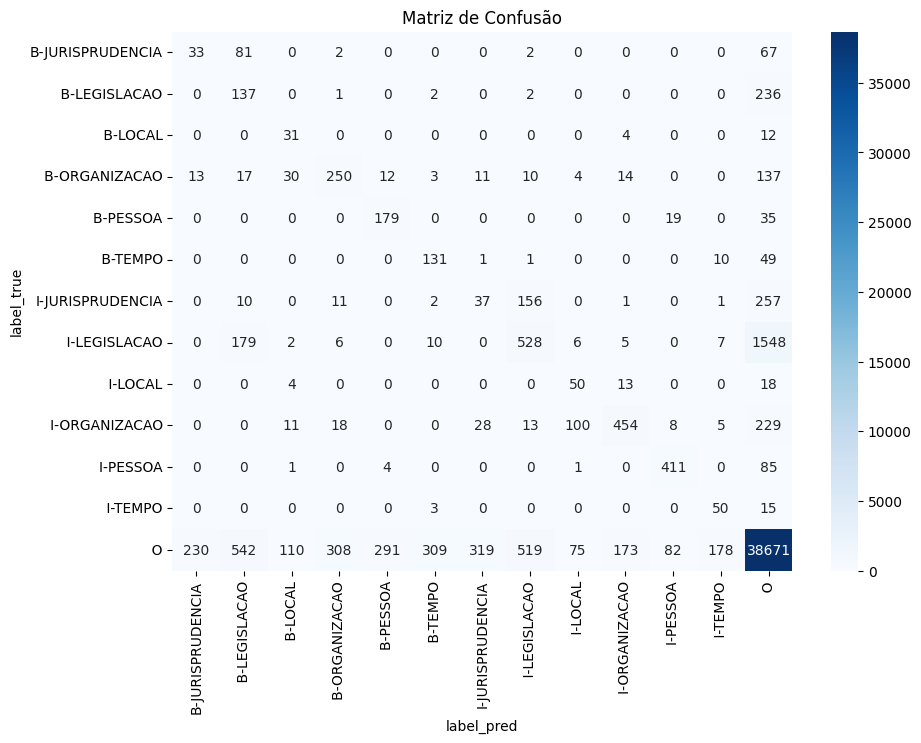

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

label_true = list(chain(*item03.ner_tags))
label_pred = list(list(chain(*item03.ner_chatgp)))
report = classification_report(label_true, label_pred)
print(report)
cm = confusion_matrix(label_true, label_pred)
class_names = [line.split('\t')[0][:-41] for line in report.split('\n')[2:-5]]
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.ylabel('label_true')
plt.xlabel('label_pred')
plt.title('Matriz de Confusão')
plt.show()

In [ ]:
#antigo
# labels = [label_list[i] for i in example[f"{task}_tags"]]
metric.compute(predictions=item03.ner_chatgp, references=item03.ner_tags)

{'JURISPRUDENCIA': {'precision': 0.11538461538461539,
  'recall': 0.016216216216216217,
  'f1': 0.02843601895734597,
  'number': 185},
 'LEGISLACAO': {'precision': 0.09032258064516129,
  'recall': 0.037037037037037035,
  'f1': 0.05253283302063789,
  'number': 378},
 'LOCAL': {'precision': 0.14705882352941177,
  'recall': 0.10638297872340426,
  'f1': 0.12345679012345678,
  'number': 47},
 'ORGANIZACAO': {'precision': 0.3076923076923077,
  'recall': 0.03992015968063872,
  'f1': 0.0706713780918728,
  'number': 501},
 'PESSOA': {'precision': 0.17894736842105263,
  'recall': 0.07296137339055794,
  'f1': 0.10365853658536585,
  'number': 233},
 'TEMPO': {'precision': 0.16470588235294117,
  'recall': 0.07291666666666667,
  'f1': 0.10108303249097474,
  'number': 192},
 'overall_precision': 0.15869565217391304,
 'overall_recall': 0.047526041666666664,
 'overall_f1': 0.07314629258517034,
 'overall_accuracy': 0.8706907411295403}